In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [289]:
X, y = make_blobs(n_samples=500, n_features=2, centers=2)
mean = (0, 0)
cov = np.array([[1, 0], [0, 1]])
proj_vector = np.random.multivariate_normal(mean, cov, 100)
proj_vector = proj_vector / np.linalg.norm(proj_vector, axis=1)[:, None]    


In [290]:
def project(X, proj_vector):
    return np.dot(X, proj_vector)

In [297]:
def anomaly_score(point, show_plot=False):
    anomaly_score = []
    range_num = (-100, 100)
    bins_num = 300
    for p_vector in proj_vector:
        X_proj = project(X, p_vector)
        # create histograms 
        hist = np.histogram(X_proj, bins=bins_num, range=range_num)
        
        # print(len(hist))
        # print(hist[0])
        # print(hist[1])
        
        prob = hist[0] / len(hist[0])
        point_proj = np.dot(point, p_vector)
        
        # print(prob)
        if show_plot:
            plt.hist(X_proj, bins=bins_num, range=range_num)
            plt.scatter(point_proj, 0, color='red')
            plt.show()
        
        # bin index for this point
        bin_idx = np.digitize(point_proj, hist[1])
        
        if bin_idx >= len(prob):
            bin_idx = len(prob) - 1
        # print(bin_idx, len(prob))
        
        # calculate the anomaly score
        # eps = 1e-8
        # print(prob[bin_idx] + eps)
        # print(-np.log(prob[bin_idx] + eps))
        anomaly_score.append(prob[bin_idx])
        
    return np.mean(anomaly_score)
    

In [298]:
random_point = np.random.uniform(-10, 10, 2)
random_point_score = anomaly_score(random_point)

print(random_point)
print(random_point_score)

[-4.35783023 -7.90485881]
0.04806666666666667


In [301]:
X_test = np.random.uniform(-15, 15, (1000, 2))
X_test_probs = np.array([anomaly_score(x) for x in X_test])

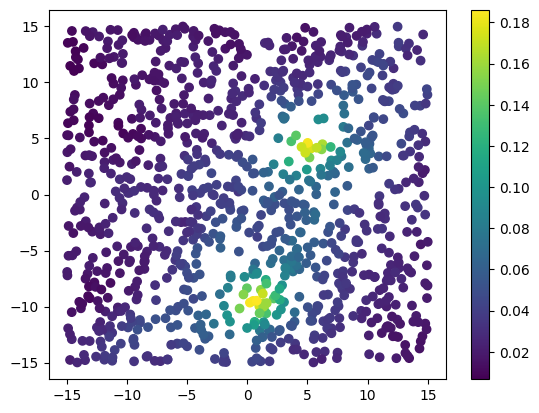

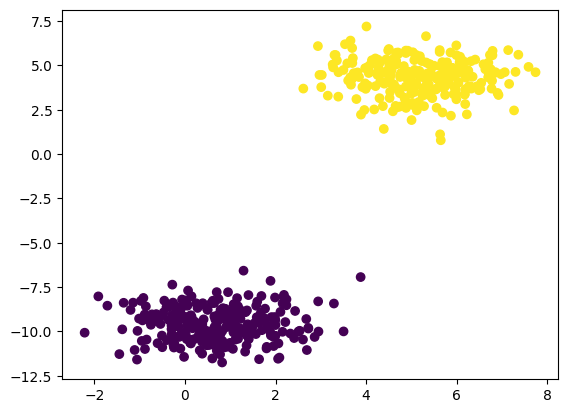

In [302]:
# make two plots, one with the original data and one with the anomaly scores
plt.scatter(X_test[:, 0], X_test[:, 1], c=X_test_probs)
plt.colorbar()
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()